<h1><center><b>Linear Regression</b></center></h1>
<h2><center><b>Loan Amount Prediction</b></center></h2>
 

## Define the Problem and Set Objectives  
The objective is to predict the loan amount variable using a regression model. The aim is to discover the relationship between the loan amount, which is the dependent variable, and the independent variables. Identify the independent variables that are significant in the prediction process.

Conduct exploratory data analysis (EDA) and statistical analysis.

Create different charts and plots to represent the distributions and relationships between variable.   

Answer Questions about the Data...

## Import the needed Python libraries

In [1]:
import pandas as pd  # For Data Manipulation
import numpy as np   # For Scientific Computing
import matplotlib.pyplot as plt # For Data Visualization
import seaborn as sns # For Advanced Data Visualization 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



---

## Load the Data Set

In [2]:
Data = pd.read_csv("Loan_amount.csv")
Data.info() # General Information about the Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  20000 non-null  object 
 1   Name                         20000 non-null  object 
 2   Gender                       19969 non-null  object 
 3   Age                          20000 non-null  int64  
 4   Income (USD)                 19250 non-null  float64
 5   Income Stability             19187 non-null  object 
 6   Profession                   20000 non-null  object 
 7   Type of Employment           15311 non-null  object 
 8   Location                     20000 non-null  object 
 9   Loan Amount                  20000 non-null  float64
 10  Current Loan Expenses (USD)  19917 non-null  float64
 11  Expense Type 1               20000 non-null  object 
 12  Expense Type 2               20000 non-null  object 
 13  Dependents      

In [3]:
# Find the Shape ( rows , columns ) of the DataSet 
Data.shape
print("Number of Rows -->" , Data.shape[0])
print("Number of Columns -->" , Data.shape[1])

# Data Types
Data.dtypes

Number of Rows --> 20000
Number of Columns --> 23


Customer ID                     object
Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount                    float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                    object
Property Price                  object
dtype: object

---
# **Data Cleaning and Manipulation.** 

In [4]:
# Check Missing Values (Number of missing values in each variable)

Data.isna().sum()

# For Proportions 
# Data.isna().sum() *100 / len(Data)

Customer ID                       0
Name                              0
Gender                           31
Age                               0
Income (USD)                    750
Income Stability                813
Profession                        0
Type of Employment             4689
Location                          0
Loan Amount                       0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property ID                       0
Property Age                    892
Property Type                     0
Property Location               160
Co-Applicant                      0
Property Price                    0
dtype: int64


---
## - Handling Missing Values

In [5]:

Columns = ['Gender' , 'Type of Employment', 'Current Loan Expenses (USD)']
Data = Data.dropna(subset = Columns)

# Handling Missing Values (Mean)
Data['Property Age'] = Data['Property Age'].fillna(Data['Property Age'].mean())
Data['Income (USD)'] = Data['Income (USD)'].fillna(Data['Income (USD)'].mean())
Data['Income (USD)'] = Data['Income (USD)'].fillna(Data['Income (USD)'].mean())
Data['Credit Score'] = Data['Credit Score'].fillna(Data['Credit Score'].mean())


# Handling Missing Values (Mode)
Data['Income Stability'] = Data['Income Stability'].fillna(Data['Income Stability'].mode()[0])
Data['Has Active Credit Card'] = Data['Has Active Credit Card'].fillna(Data['Has Active Credit Card'].mode()[0])
Data['Location'] = Data['Location'].fillna(Data['Location'].mode()[0])
Data['Dependents'] = Data['Dependents'].fillna(Data['Dependents'].mode()[0])
Data['Property Location'] = Data['Property Location'].fillna(Data['Property Location'].mode()[0])

print(Data.shape)

# Recheck the missing values 
Data.isna().sum()


(15226, 23)


Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount                    0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
dtype: int64

## - Cheking for Duplicated Records 


In [6]:

Data.duplicated().sum()


0

In [7]:
# Rename the Column ' Current Loan Expenses '
Data = Data.rename(columns = {'Current Loan Expenses (USD)':'CLE (USD)'})


# Convert Property Price type to Numeric 
Data['Property Price'] = Data['Property Price'].replace( '?', 0 )
Data['Property Price'] = pd.to_numeric(Data['Property Price'])
PriceM = (Data['Property Price'].sum()) /(Data['Property Price'].count() - 129)

Data['Property Price'] = Data['Property Price'].replace( 0, PriceM )


<br><br>

---

## **- Now the Data is ready for EDA,  Steps follows a Systematic Set of Steps to Explore Data**
<br>

In [8]:
Data.sample(3)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount,...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
15818,C-12045,Deborah Showers,M,46,3262.87,Low,Working,Sales staff,Semi-Urban,42502.00,...,3.0,740.28,0,Inactive,342,3262.870000,1,Urban,1,60162.15
15458,C-16122,Jeanine Tabarez,M,58,20776.53,Low,Working,Managers,Rural,123121.34,...,2.0,635.67,0,Active,90,2565.874637,4,Semi-Urban,0,172842.13
3376,C-38084,Samantha Leech,F,49,1532.90,Low,State servant,Medicine staff,Semi-Urban,27999.41,...,2.0,706.33,0,Inactive,404,1532.900000,2,Urban,1,36565.72


<br><br>

---


## **- Basic Statistics Summary -- Univariate Analysis**

In [9]:
sts = Data[['Age','Income (USD)','Loan Amount','CLE (USD)','Dependents','Credit Score','Property Age', 'Property Price']]
sts.describe()

,Age,Income (USD),Loan Amount,CLE (USD),Dependents,Credit Score,Property Age,Property Price
count,15226.000000,15226.000000,15226.000000,15226.000000,15226.000000,15226.000000,15226.000000,15226.000000
mean,37.591685,2569.624026,88862.361825,411.173665,2.289702,731.210853,2565.874637,133455.407456
std,15.022213,1396.232144,59851.014410,215.851874,0.940849,69.172196,1382.376947,92620.198529
min,18.000000,397.450000,6185.480000,42.950000,1.000000,580.040000,397.450000,7353.490000
25%,23.000000,1706.010000,40974.252500,253.702500,2.000000,676.460000,1707.762500,62140.000000
50%,37.000000,2308.235000,74364.645000,378.245000,2.000000,731.210853,2314.595000,111803.245000
75%,51.000000,3065.622500,120820.747500,522.807500,3.000000,785.107500,3057.390000,179609.747500
max,64.000000,30427.680000,576335.680000,3305.970000,13.000000,891.910000,30427.680000,816375.090000


In [10]:
Data.describe(include='object')

,Customer ID,Name,Gender,Income Stability,Profession,Type of Employment,Location,Expense Type 1,Expense Type 2,Has Active Credit Card,Property Location,Co-Applicant
count,15226,15226,15226,15226,15226,15226,15226,15226,15226,15226,15226,15226
unique,15226,15226,2,1,5,18,3,2,2,3,3,3
top,C-26247,Tandra Olszewski,F,Low,Working,Laborers,Semi-Urban,N,Y,Active,Semi-Urban,1
freq,1,1,7734,15226,9583,3725,11040,9496,10137,5721,5369,13344



---

## **- Number of Unique Values in each variable**

In [11]:
print(Data.nunique())

Customer ID               15226
Name                      15226
Gender                        2
Age                          47
Income (USD)              14316
Income Stability              1
Profession                    5
Type of Employment           18
Location                      3
Loan Amount               15217
CLE (USD)                 13646
Expense Type 1                2
Expense Type 2                2
Dependents                   10
Credit Score              11215
No. of Defaults               2
Has Active Credit Card        3
Property ID                 999
Property Age              14217
Property Type                 4
Property Location             3
Co-Applicant                  3
Property Price            15092
dtype: int64


---
## **Correlation Anaylsis -- Bivariate Analysis**

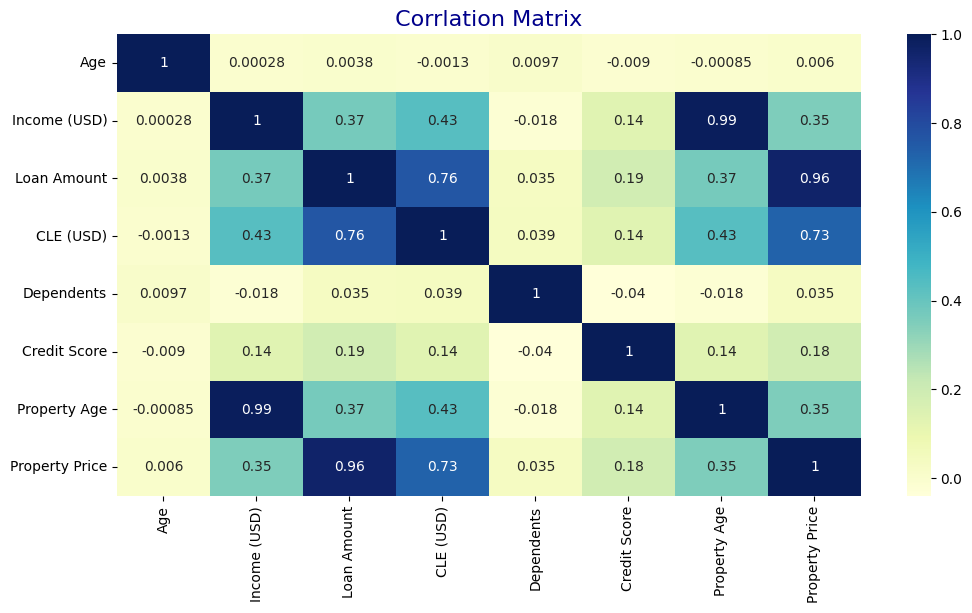

In [12]:
# DataSet of Numaric Variable 
NumData = Data[['Age','Income (USD)','Loan Amount','CLE (USD)','Dependents','Credit Score','Property Age', 'Property Price']]

plt.figure(figsize =(12,6))
sns.heatmap(NumData.corr() , annot = True, cmap ='YlGnBu')
plt.title(" Corrlation Matrix ", color = 'darkblue' , fontsize =16)
plt.show()


### - As we see in a Correlation Matrix there are a few number of variable that Correlated to Loun Amount <br> in our data, like 'Income' 'Current Loan Expenses' ,'Property Age' , 'Credit Score'.<br> <br>- And 'Property Price' have a strong positive linear relationship with Loan Amount, that we can use it to create a simple linear model.

### - And we see that 'Income' and 'Property Age' also have a strong positive linear relationship with each other.

### - And 'Current Loan Expenses' and 'Property Price' also have a strong relationship with each other.



<br><br>

---


# **Data Visualization**
## **- Pie Chart that represnt the proportion of Profession in our Data**

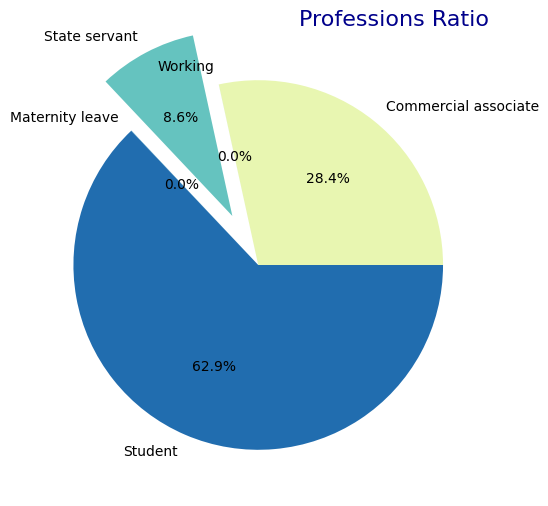

In [13]:
labels = Data['Profession'].unique()
SubData1 = Data.groupby(Data['Profession'])['Customer ID'].count()


plt.figure(figsize  = (20,6))
palette_color = sns.color_palette('YlGnBu') 
plt.pie(SubData1, labels=labels, autopct='%1.1f%%',colors=palette_color , explode = [0.,0.0,0.3 ,0,0]  ) 
plt.title('Professions Ratio' , loc ='right' , color = 'darkblue' , fontsize =16)

plt.show()

--- 
## **- Bar Chart shows the number of Customer and there type of Employment.**

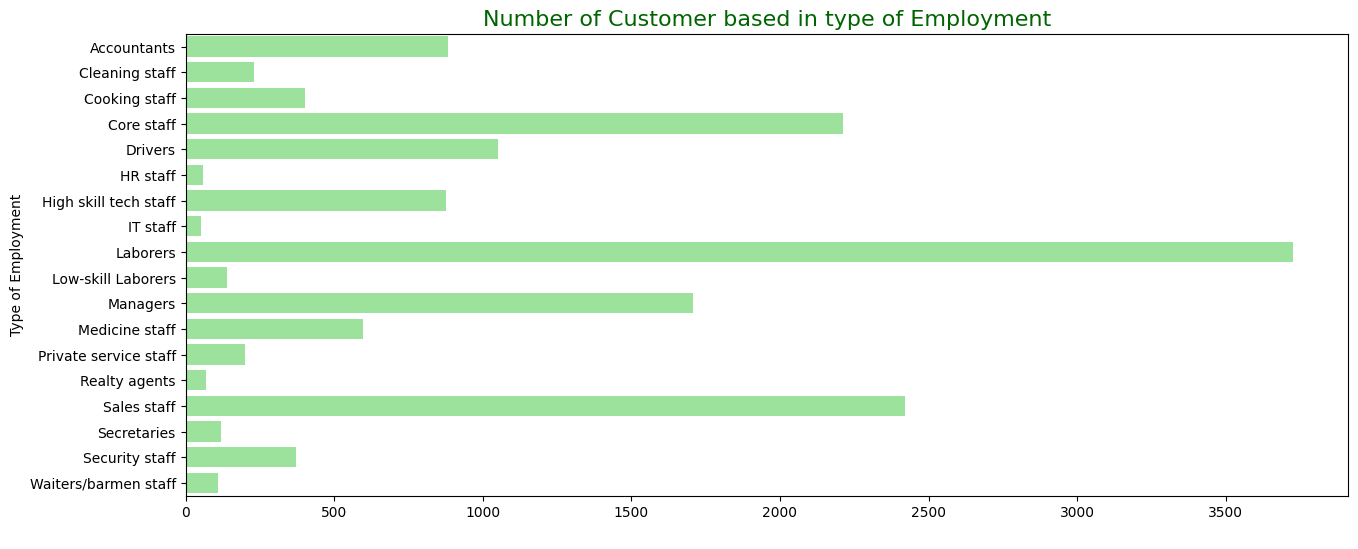

In [14]:
labels = Data['Type of Employment'].unique()
SubData2 = Data.groupby(Data['Type of Employment'])['Customer ID'].count()

plt.figure(figsize  = (15,6))
sns.barplot(SubData2 , width=0.8 , orient="y", color = 'lightgreen' ) 
plt.xlabel(' ')

plt.title("Number of Customer based in type of Employment" , color = 'darkgreen' , fontsize =16)
plt.show()

---

## **- Pie Chart that show Gender ratio**

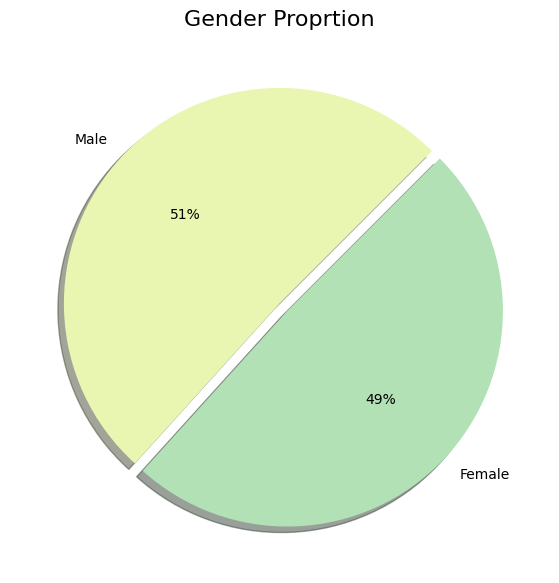

In [15]:
keys =['Male',  'Female']

Gender = Data.groupby(Data["Gender"])['Customer ID'].count()


plt.figure(figsize= (10,7))
palette_color = sns.color_palette('YlGnBu') 
plt.pie(Gender, labels=keys, autopct='%.0f%%',colors=palette_color , explode = [0,0.05] , shadow=True, startangle=45) 


plt.title("Gender Proprtion" , color = 'black' , fontsize =16)
plt.show()

---

## **- Box plots for Property Location and there Prices**

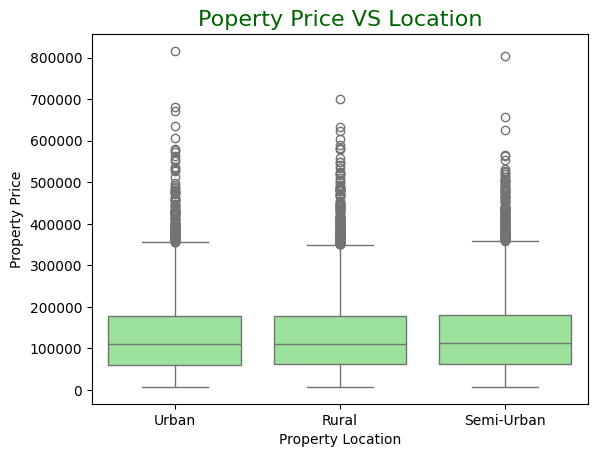

In [16]:
sns.boxplot(data=Data , x ='Property Location', y ='Property Price', color = 'lightgreen')
plt.title('Poperty Price VS Location' , color = 'darkgreen' , fontsize =16)
plt.show()

### **- There are a lot of outliers!! , this is interesting ...**

---


### **- Pair plot that shows different distribution and relationship for several variables that have good relationship with loan amount**

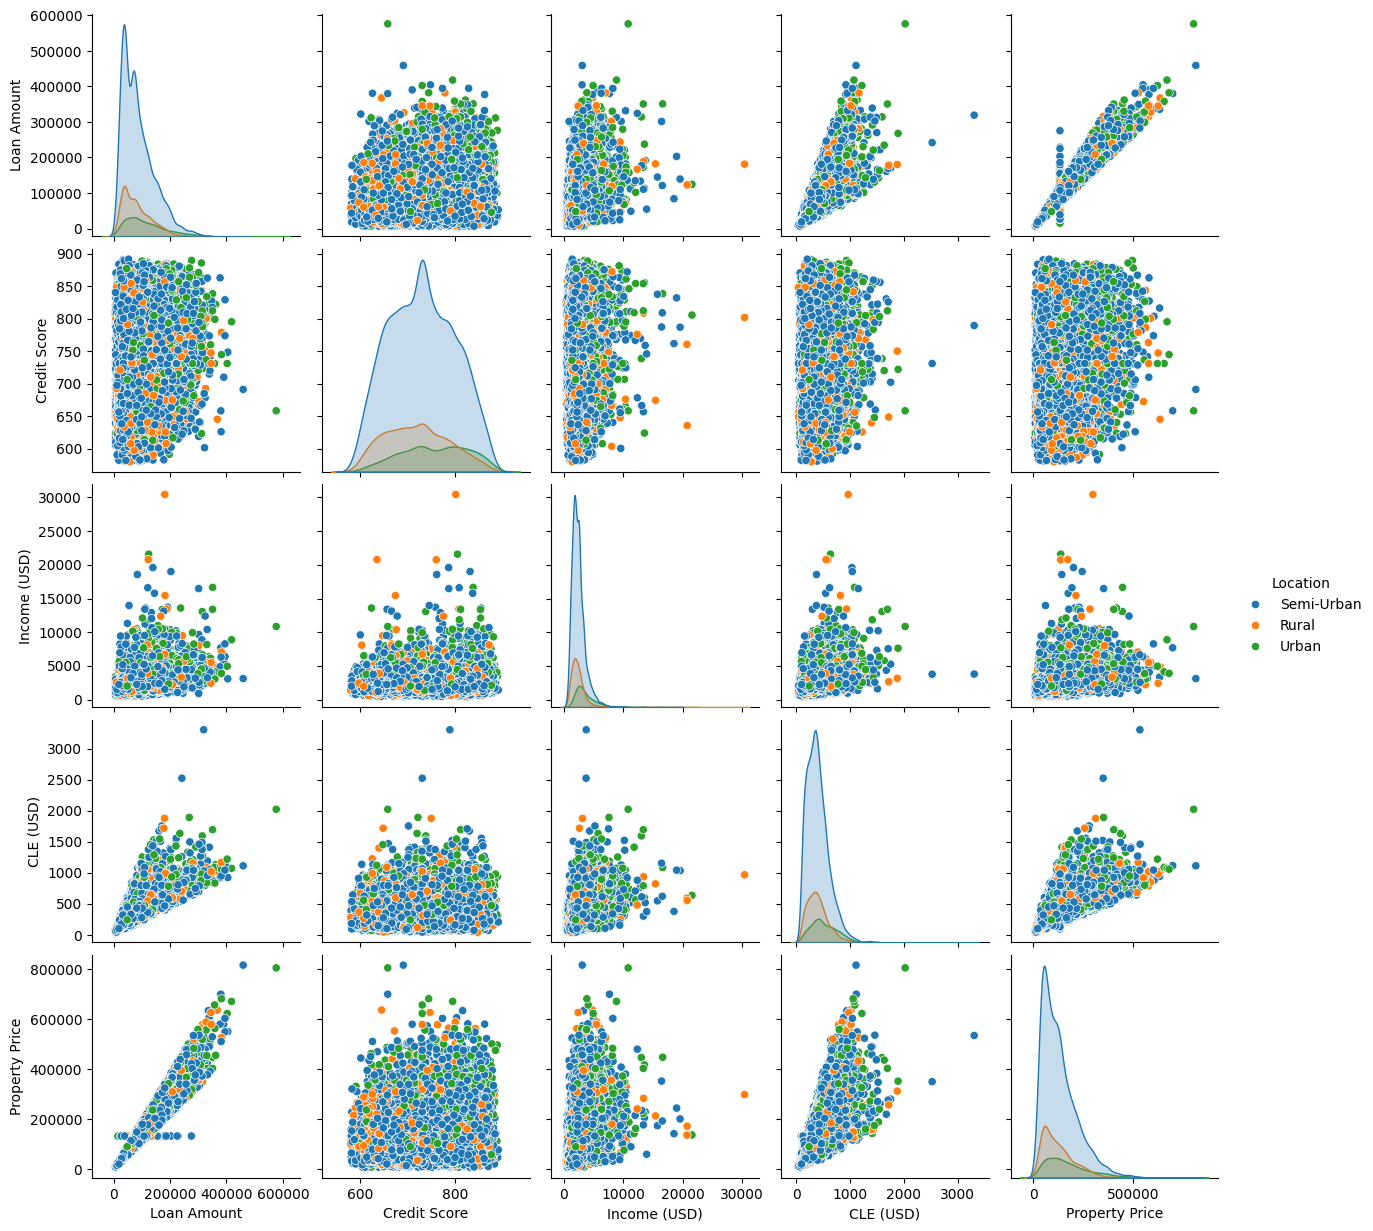

In [17]:
SubData =  Data[['Loan Amount','Credit Score' , 'Income (USD)', 'CLE (USD)' ,'Property Price', 'Location']]
sns.pairplot(SubData,  hue='Location')
plt.show()

---
### **- Regression plots that describe the relationship for dependent variable 'Loan Amount' with top 4<br> <br>  independent variable that has a good relationship with it.**

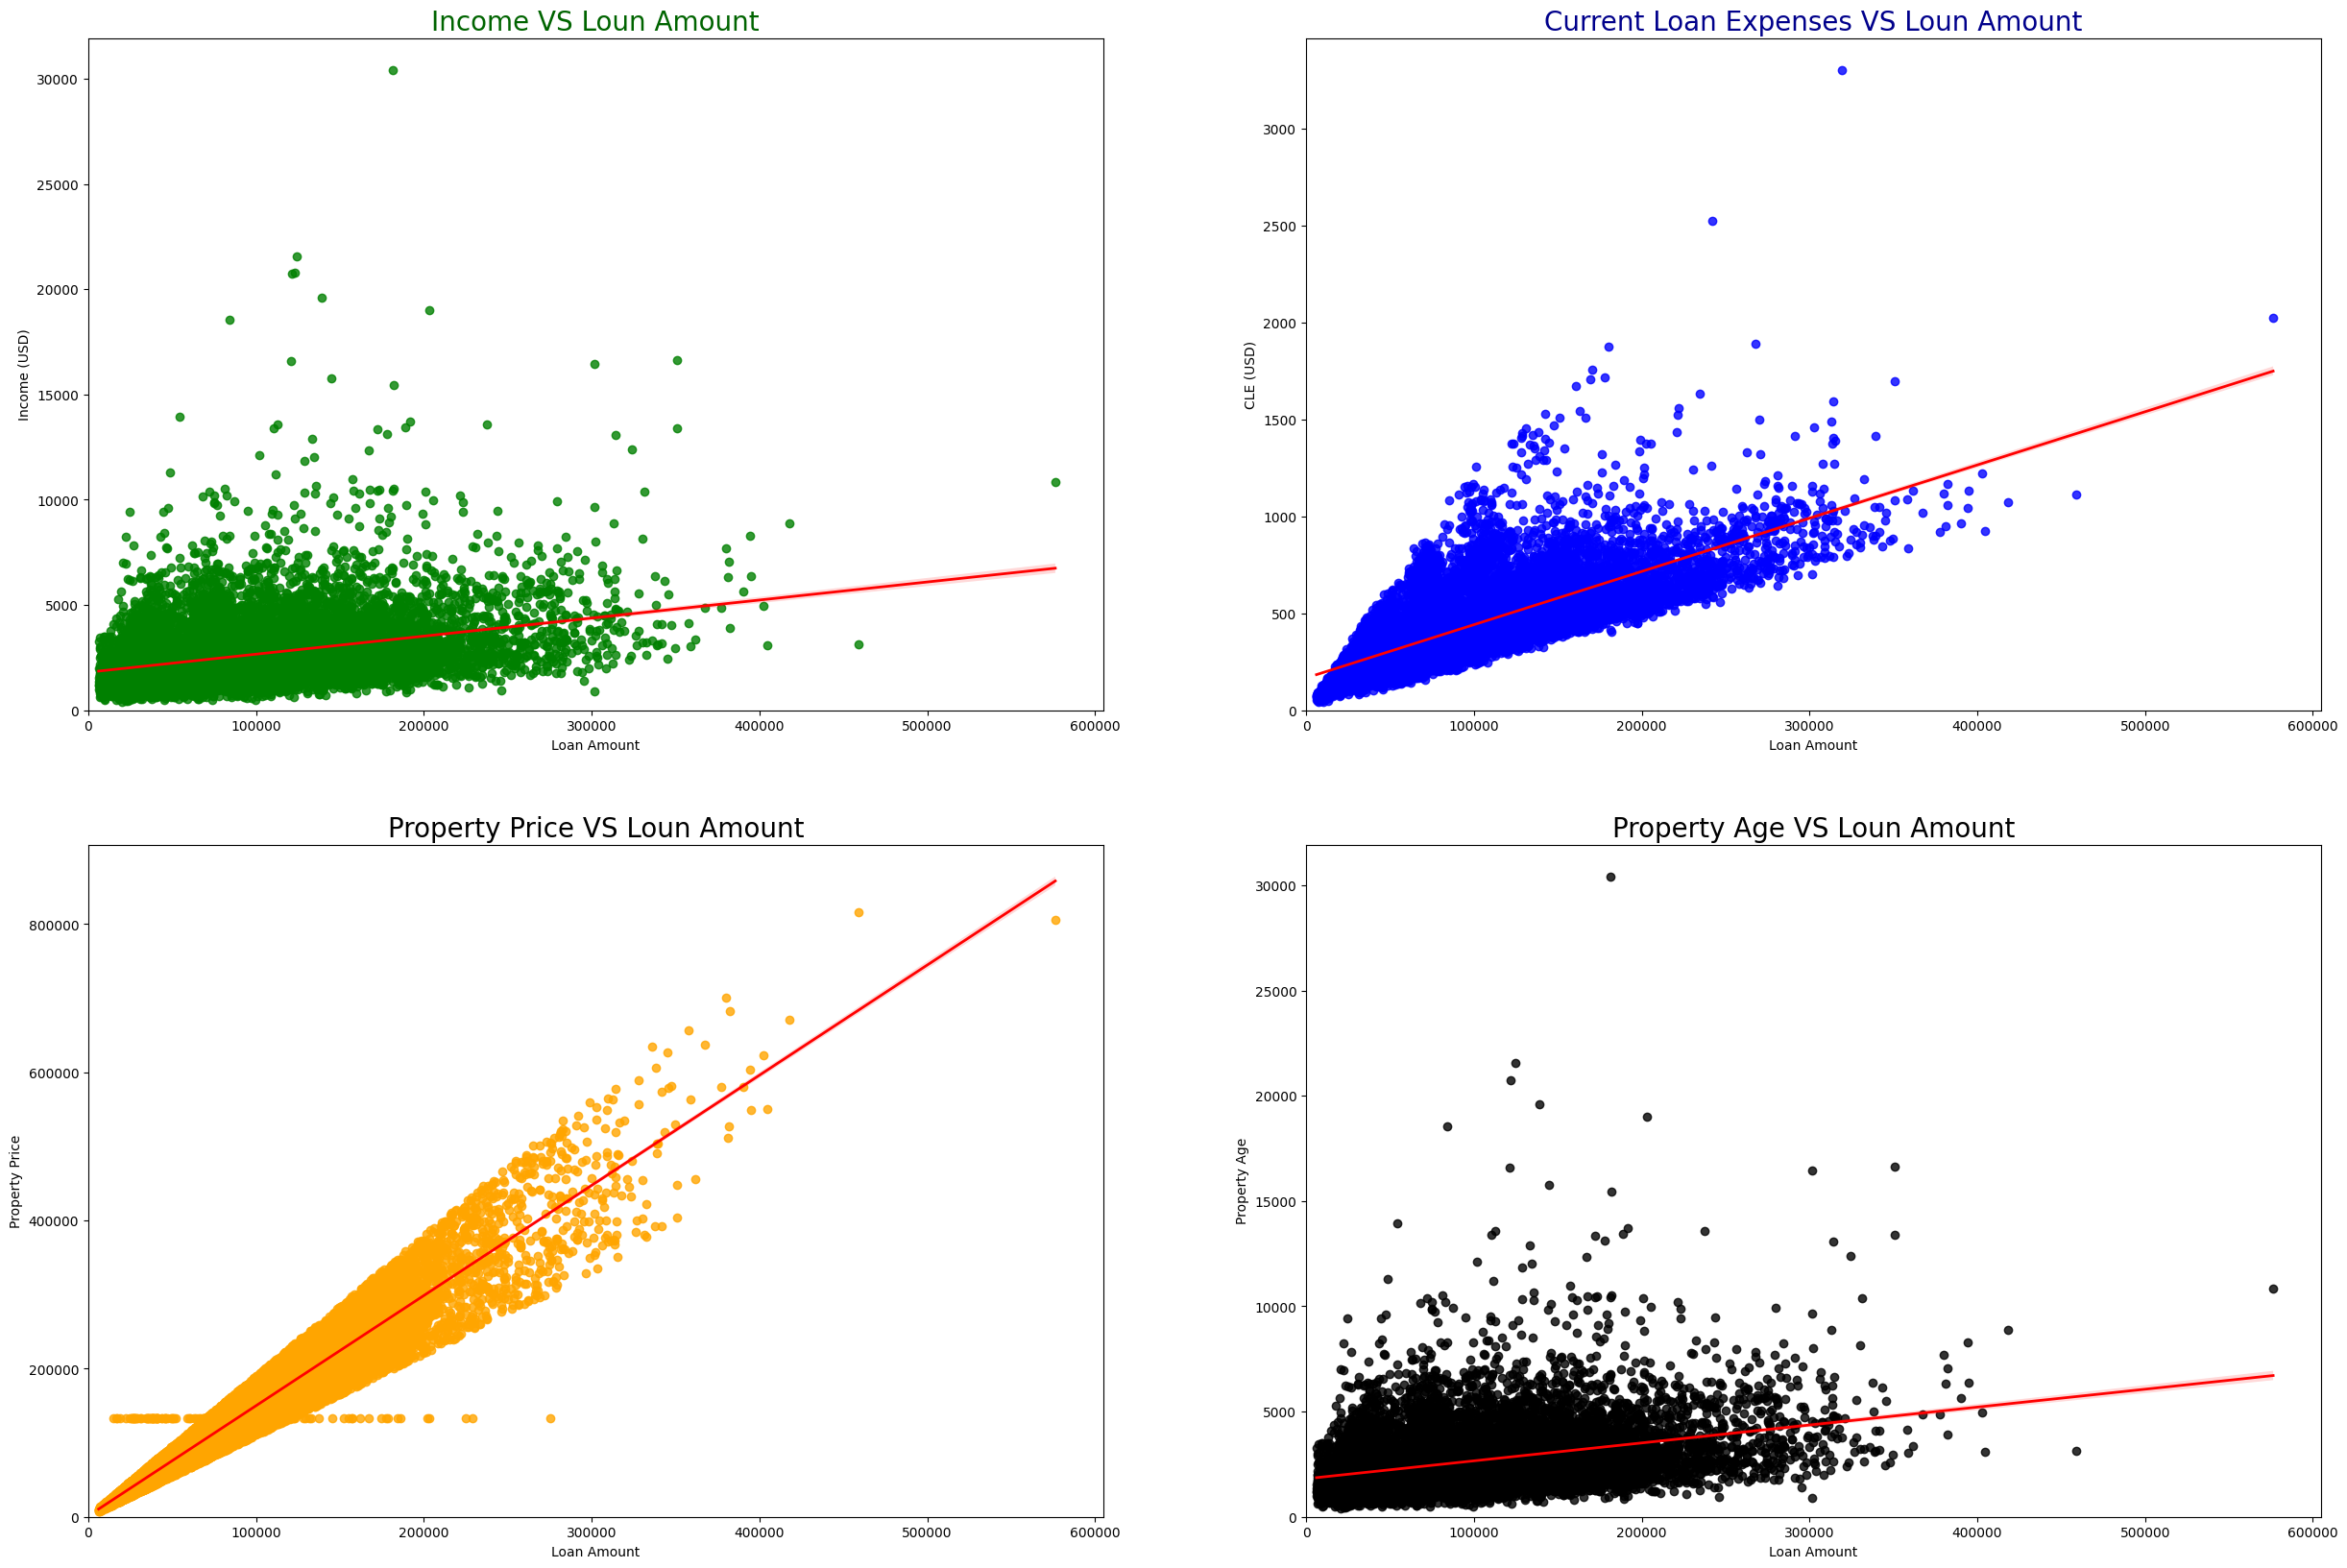

In [18]:
# Using Subplots function in seaborn lib

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 20))
sns.regplot(data= Data, y='Income (USD)' , x='Loan Amount' , ax= axes[0 ,0] ,line_kws={"color": "red", "linewidth": 2}, color = 'green')
sns.regplot(data= Data, y='CLE (USD)' , x='Loan Amount' , ax= axes[0,1] ,line_kws={"color": "red", "linewidth": 2}, color =  'blue')
sns.regplot(data= Data , y = 'Property Price' , x='Loan Amount' , ax= axes[1, 0] ,line_kws={"color": "red", "linewidth": 2}, color =  'orange')
sns.regplot(data= Data , y = 'Property Age' , x='Loan Amount' , ax= axes[1, 1] ,line_kws={"color": "red", "linewidth": 2}, color =  'black')

axes[0,0].set_ylim(0)
axes[0,0].set_xlim(0)

axes[0,1].set_ylim(0)
axes[0,1].set_xlim(0)

axes[1,0].set_ylim(0)
axes[1,0].set_xlim(0)

axes[1,1].set_ylim(0)
axes[1,1].set_xlim(0)



axes[0,0].set_title("Income VS Loun Amount" , color = 'darkgreen' , fontsize = 20)
axes[0,1].set_title("Current Loan Expenses VS Loun Amount" , color = 'darkblue' , fontsize = 20)
axes[1,0].set_title("Property Price VS Loun Amount" ,color = 'black' , fontsize = 20)
axes[1,1].set_title("Property Age VS Loun Amount" , color = 'black' , fontsize = 20)




plt.show()

---
### **- Histogram That Show Age Distribution**



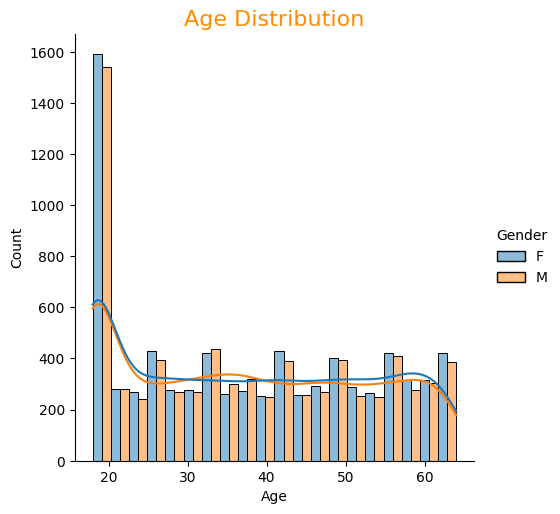

In [19]:
sns.displot(data =Data, x="Age", hue="Gender" , multiple="dodge" , bins = 20 , kde=True)
plt.title("Age Distribution" , color = 'darkorange', fontsize ='16')
plt.show()


---
### **- Line Chart that show Income across different age**

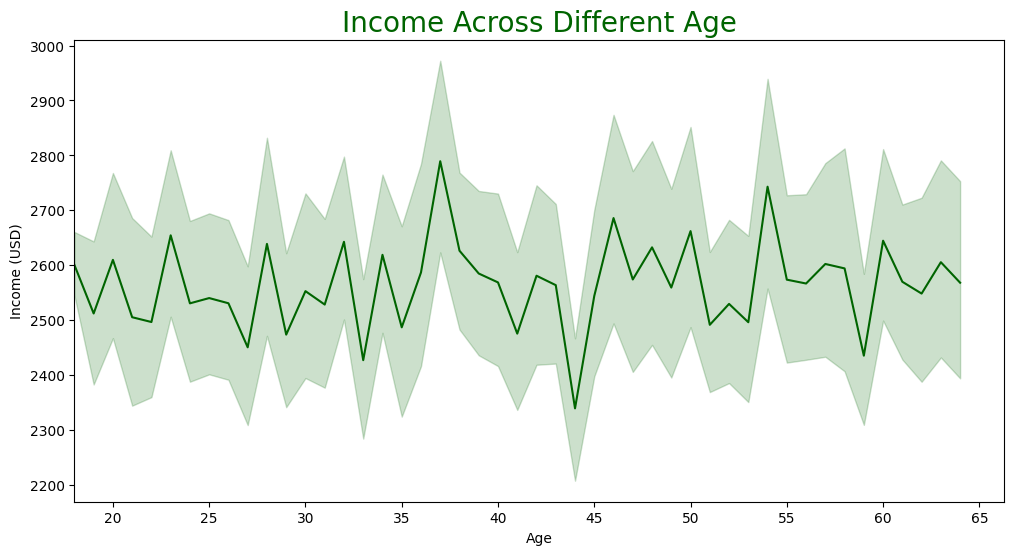

In [20]:
plt.figure(figsize = (12,6))
sns.lineplot(data = Data , x = 'Age', y='Income (USD)' , color ='darkgreen')

plt.xticks(np.arange(20,70,5))
plt.xlim(18)

plt.title("Income Across Different Age" , color = 'darkgreen' , fontsize = 20)

plt.show()

## Save the new data set after processing

In [21]:
Data.to_csv("Loan Amount (Updated).csv")

---
---
---
# **Linear Regression**
### **Simple Linear Regression Model (Property Price VS Loan Amount)**

In [22]:
# Prepare The Data
SLR = Data [['Property Price' , 'Loan Amount']]

X = SLR['Property Price']
y = SLR['Loan Amount']


---
### -  Spliting the data into Training '80%' and Testing '20%'


In [23]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 ,  random_state = 20)


### - It takes it random rows to make up that 80% or 20%

In [24]:
X_train

17544    213036.44
17277     94662.56
7521     104873.63
11098    114392.51
14551    181678.50
           ...    
19342     38330.50
9245     136537.31
9666     143596.49
5736     135527.03
14071     72779.81
Name: Property Price, Length: 12180, dtype: float64

---
### - In Sikit-learn library the machine learning algorithm take a 2-D Data and create a LR Model 

In [25]:

X_train = np.array(X_train).reshape(-1,1)

X_test= np.array(X_test).reshape(-1,1)


In [26]:
LR = LinearRegression()

---
### - Traning the Model 
### - What this will do ? we keep changing 𝑏₀ and 𝑏₁ and we found the optimum for best fit line.

In [27]:
LR.fit(X_train , y_train)

LinearRegression()

### - The Parameters of model are .intercept_, which represents the coefficient 𝑏₀, and .coef_, which represents 𝑏₁ .

In [28]:
B0 = LR.intercept_  
B0

6110.851563676435

In [29]:
B1 = LR.coef_
B1


array([0.61962872])

---
### - y_pred_test : Shows What The Result of Predicting the X_test.
### - First PLoting the X, and Y Test set, and then plot what the model Predict.
### - The model have neaver seen X_test and y_test, so we can test in it. 

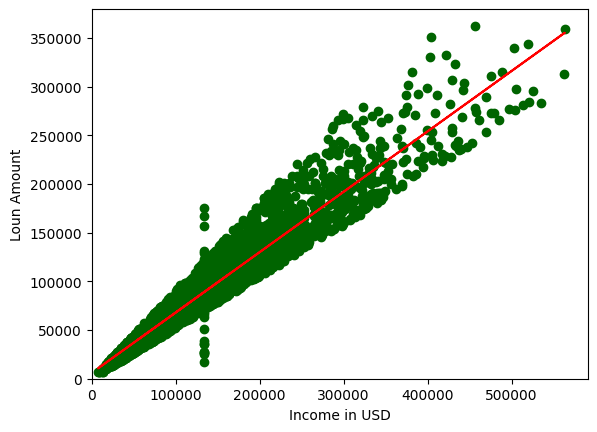

In [30]:
y_pred_test = LR.predict(X_test)
# What a model predict based in X_test


# What is the actual data look like 
plt.scatter(X_test, y_test , color = 'darkgreen')
plt.xlabel('Income in USD')
plt.ylabel('Loun Amount')


# What the model predict 
plt.plot(X_test, y_pred_test , color = 'red')
plt.xlabel('Income in USD')
plt.ylabel('Loun Amount')

plt.xlim(0)
plt.ylim(0)


plt.show()

### - The difference between the actual data and the predicted data is known as **Error**.
---
## - Evaluation Metrics for Regression models

In [31]:
MAE = mean_absolute_error(y_test, y_pred_test)
MSE = mean_squared_error(y_test, y_pred_test)
R2 = r2_score(y_test, y_pred_test)

print(f'R-Squared --> {R2}')
print(f'Mean absolute error (MAE) --> {MAE}')
print(f'Mean squared error (MSE) --> {MSE}')

R-Squared --> 0.9227734135404349
Mean absolute error (MAE) --> 11861.375801340577
Mean squared error (MSE) --> 280317558.27399


---
---
---

## **Simple Linear Regression Model (Current Loan Expenses VS Loan Amount)**

In [32]:
SLR1 = Data [['CLE (USD)' , 'Loan Amount']]

X1 = SLR1['CLE (USD)']
y1 = SLR1['Loan Amount']


### -  Spliting the data into Training '80%' and Testing '20%'


In [33]:
X1_train , X1_test , y1_train , y1_test = train_test_split(X1 , y1 , test_size = 0.2 ,  random_state = 20)

# It takes it random rows to make up that 80% or 20%

---
### - In Sikit-learn library the machine learning algorithm take a 2-D Data and create a LR Model 

In [34]:
# in Sikit-learn library the machine learning algorithm take a 2-D Data
X1_train = np.array(X1_train).reshape(-1,1)

X1_test= np.array(X1_test).reshape(-1,1)


In [35]:
LR1 = LinearRegression()

---
### - Traning the Model 
### - What this will do ? we keep changing 𝑏₀ and 𝑏₁ and we found the optimum for best fit line.

In [36]:
LR1.fit(X1_train , y1_train)

LinearRegression()

### - The Parameters of model are .intercept_, which represents the coefficient 𝑏₀, and .coef_, which represents 𝑏₁ .

In [37]:
B0_1 = LR1.intercept_
B0_1

2156.604742886455

In [38]:
B1_1 = LR.coef_
B1_1


array([0.61962872])

---
### - y_pred_test : Shows What The Result of Predicting the X_test.
### - First PLoting the X, and Y Test set, and then plot what the model Predict.
### - The model have neaver seen X_test and y_test, so we can test in it. 

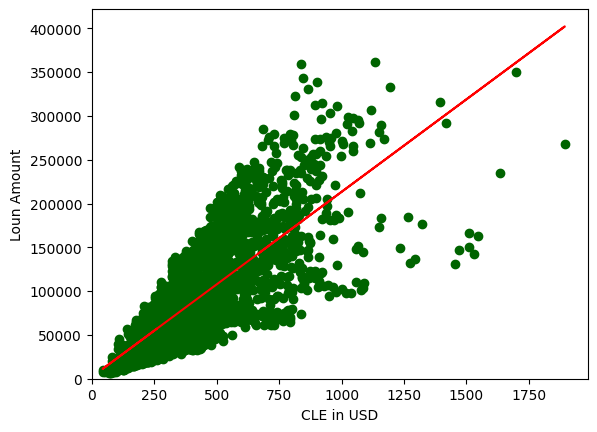

In [39]:
y1_pred_test = LR1.predict(X1_test)

plt.scatter(X1_test, y1_test , color = 'darkgreen')
plt.xlabel('CLE in USD')
plt.ylabel('Loun Amount')

plt.plot(X1_test, y1_pred_test , color = 'red')


plt.xlim(0)
plt.ylim(0)


plt.show()

### - The difference between the actual data and the predicted data is known as **Error**.
---
## - Evaluation Metrics for Regression model

In [40]:
MAE_1 = mean_absolute_error(y1_test, y1_pred_test)
MSE_1 = mean_squared_error(y1_test, y1_pred_test)
R2_1 = r2_score(y1_test, y1_pred_test)

print(f'R-Squared --> {R2_1}')
print(f'Mean absolute error (MAE) --> {MAE_1}')
print(f'Mean squared error (MSE) --> {MSE_1}')

R-Squared --> 0.5902467869149446
Mean absolute error (MAE) --> 28179.255924412897
Mean squared error (MSE) --> 1487324837.8919914


---
---
---

# **Multiple Linear Regression**

In [41]:
MLR = Data [['CLE (USD)' ,'Income (USD)','Property Price', 'Loan Amount']]

X2 = MLR[['CLE (USD)' , 'Income (USD)','Property Price']]
y2 = MLR['Loan Amount']


In [42]:
X2_train , X2_test , y2_train , y2_test = train_test_split(X2, y2, test_size = 0.2 ,  random_state = 20)


In [43]:
LR3 = LinearRegression()

In [44]:
LR3.fit(X2_test, y2_test)

LinearRegression()

In [45]:
B0_2 = LR1.intercept_
B0_2

2156.604742886455

In [46]:
B1_2 = LR.coef_
B1_2


array([0.61962872])

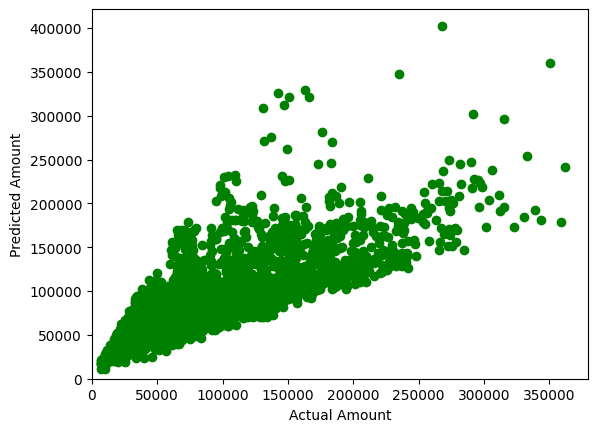

In [47]:
y2_pred_test = LR3.predict(X2_test)

plt.scatter(y1_test, y1_pred_test , color = 'green')
plt.xlabel('Actual Amount')
plt.ylabel('Predicted Amount')

plt.xlim(0)
plt.ylim(0)


plt.show()

## - Evaluation Metrics for Regression models

In [48]:
MAE_2 = mean_absolute_error(y2_test, y2_pred_test)
MSE_2 = mean_squared_error(y2_test, y2_pred_test)
R2_2= r2_score(y2_test, y2_pred_test)

print(f'R-Squared --> {R2_2}')
print(f'Mean absolute error (MAE) --> {MAE_2}')
print(f'Mean squared error (MSE) --> {MSE_2}')

R-Squared --> 0.9305498983922726
Mean absolute error (MAE) --> 11178.117081026598
Mean squared error (MSE) --> 252090423.7396519


---
---
---

# Results of Models Development 
* <h3>The first model shows a strong positive relationship between loan amount and property price, achieving a 92% <br><br> R-squared, MAE = 11861.37580 and  MSE = 280317558.2 , This is evident in the heatmap that displays a high <br><br>correlation coefficient.</h3><br>

* <h3>The second model indicates a weak connection between the loan amount and income. The R-squared value is just <br><br> 59% , MAE = 28179.2559 and MSE =  1487324837.891 </h3><br>

* <h3> The third model uses 'CLE', 'Income', and 'Property Price' as independent variables to predict loan amounts in <br><br> a Multiple Linear Regression Model. The model has an impressive R-squared value of 93% , MAE = 11178.117 , <br><br>and MSE = 252090423.739  !!. </h3><br>


# Author
## **Mones Nazih Ksasbeh**4